### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
# investigate the data for empty values
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# most car values are empty, so we can drop the column
data = data.drop(columns=['car'])

In [6]:
cols = data.isnull().sum()
#iterate all colums and print the ones with empty values
for col in cols.index:
    if cols[col] > 0:
        print(data[col].value_counts())

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64
CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64
CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64
RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64
Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64


In [7]:
# all the columns with empty values have never as the value. Let's replace the empty values with never
data = data.fillna('never')

In [8]:
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [21]:
# rename passenger column
data = data.rename(columns={'passanger': 'passenger'})

In [22]:
#add an integer column for age and set 50+ as 51 and below21 as 20
data["age_int"] = data["age"].replace({'50plus': 51, 'below21': 20}).astype(int)
data["age_int"].value_counts()

age_int
21    2653
26    2559
31    2039
51    1788
36    1319
41    1093
46     686
20     547
Name: count, dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



Y
Accepted        0.568433
Not Accepted    0.431567
Name: proportion, dtype: float64


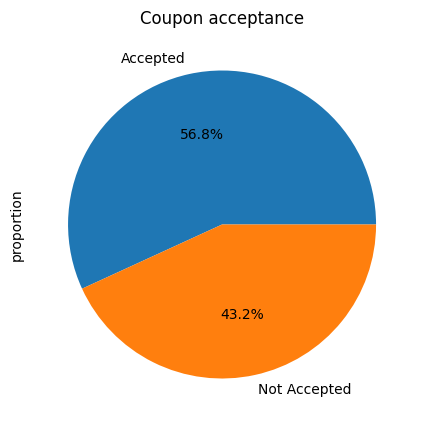

In [23]:
acceptance_data = data['Y'].replace({0: 'Not Accepted', 1: 'Accepted'}).value_counts(normalize=True)

print(acceptance_data)
plt.figure(figsize=(5,5))
acceptance_data.plot.pie(autopct='%1.1f%%')
plt.title('Coupon acceptance')
plt.show()

5. Use a bar plot to visualize the `coupon` column.

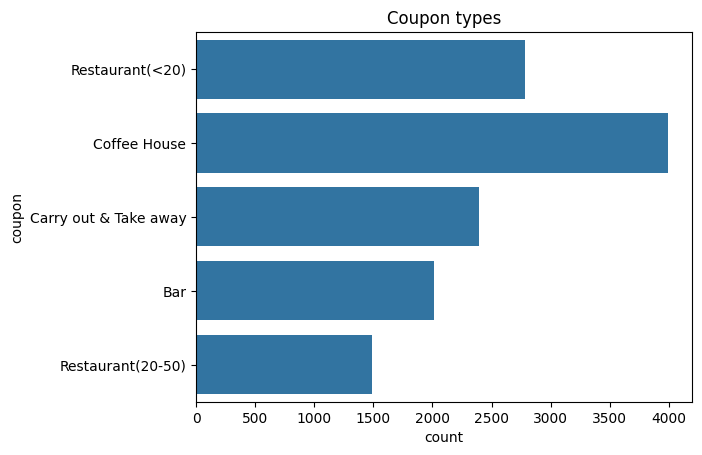

In [24]:
sns.countplot(data['coupon'])
plt.title('Coupon types')
plt.show()

6. Use a histogram to visualize the temperature column.

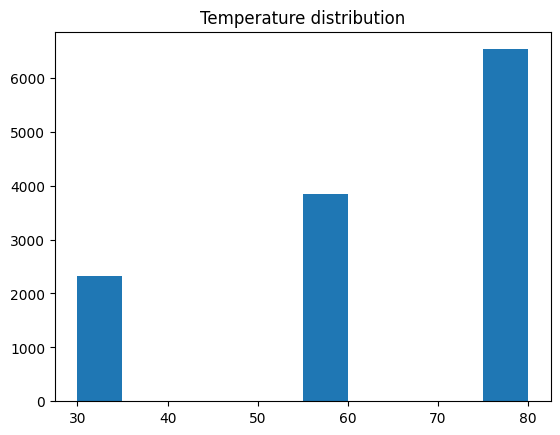

In [25]:
plt.hist(data['temperature'])
plt.title('Temperature distribution')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [26]:
bar_df = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [27]:
bar_df['Y'].replace({0: 'Not Accepted', 1: 'Accepted'}).value_counts(normalize=True)

Y
Not Accepted    0.589985
Accepted        0.410015
Name: proportion, dtype: float64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


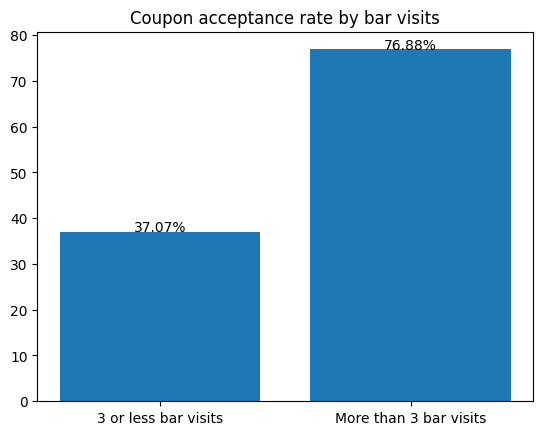

In [28]:
query_le_3 = ['never', 'less1', '1~3']
query_gt_3 = ['4~8', 'gt8']

acceptance_le_3 = bar_df.query('Bar in @query_le_3 and Y==1').shape[0] / bar_df.query('Bar in @query_le_3').shape[0] * 100
acceptance_gt_3 = bar_df.query('Bar in @query_gt_3 and Y==1').shape[0] / bar_df.query('Bar in @query_gt_3').shape[0] * 100

acceptance = [acceptance_le_3, acceptance_gt_3]
plt.bar(['3 or less bar visits', 'More than 3 bar visits'], acceptance)
plt.title('Coupon acceptance rate by bar visits')
for index, value in enumerate(acceptance):
    plt.text(index, value, f'{value:.2f}%', ha='center')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


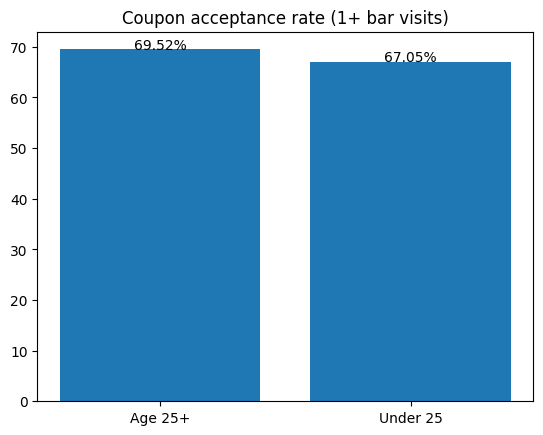

In [29]:
query_gt_1 = ['1~3', '4~8', 'gt8']

acceptance_visit_gt_1_over25 = bar_df.query('(Bar in @query_gt_1) &  (age_int > 25) & Y == 1').shape[0] / bar_df.query('(Bar in @query_gt_1) & (age_int >25)').shape[0] * 100
acceptance_visit_gt_1_under25 = bar_df.query('(Bar in @query_gt_1) & (age_int <= 25) & Y == 1').shape[0] / bar_df.query('(Bar in @query_gt_1) & (age_int <= 25)').shape[0] * 100

acceptance = [acceptance_visit_gt_1_over25, acceptance_visit_gt_1_under25]
plt.bar(['Age 25+', 'Under 25'], acceptance)
plt.title('Coupon acceptance rate (1+ bar visits)')
for index, value in enumerate(acceptance):
    plt.text(index, value, f'{value:.2f}%', ha='center')
plt.show()

There is not much difference between Ages under 25 and over 25 in terms on acceptance of coupon.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [30]:
query_gt_1 = ['1~3', '4~8', 'gt8']
passenger_conditions  = ['Alone', 'Friend(s)', 'Partner']

#bar visits > 1, not with kids, not farming, fishing or forestry
condition = '(Bar in @query_gt_1) &  (passenger in  @passenger_conditions) & (occupation != \'Farming Fishing & Forestry\')'
# acceptance_visit_gt_1_over25 = bar_df.query('(Bar in @query_gt_1) &  (passanger not in  @passenger_conditions) & (occupation == \'Farming Fishing & Forestry\') & (Y == 1)').shape[0] / bar_df.query('(Bar in @query_gt_1) &  (passanger not in  @passenger_conditions) & (occupation == \'Farming Fishing & Forestry\')').shape[0] * 100

bar_df.query(condition + ' & (Y == 1)').shape[0] /bar_df.query(condition).shape[0] * 100

71.32486388384754

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [31]:
query_gt_1 = ['1~3', '4~8', 'gt8']
passenger_conditions  = ['Alone', 'Friend(s)', 'Partner']

condition_1 = '(Bar in @query_gt_1) & (passenger in  @passenger_conditions) & (maritalStatus != \'Widowed\')' 
acceptance_1 = bar_df.query(condition_1 + ' & (Y == 1)').shape[0] /bar_df.query(condition_1).shape[0]
print(f'Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {acceptance_1:.2%}')

condition_2 = '(Bar in @query_gt_1) &  (age_int < 30)'
acceptance_2 = bar_df.query(condition_2 + ' & (Y == 1)').shape[0] /bar_df.query(condition_2).shape[0]
print(f'Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: {acceptance_2:.2%}')

income_ranges = ['$25000 - $37499', '$12500 - $24999', '$37500 - $49999', 'Less than $12500']
visits_gt_4 = ['4~8', 'gt8']
condition_3 = '(RestaurantLessThan20 in @visits_gt_4) & (income in  @income_ranges)'
acceptance_3 = bar_df.query(condition_3 + ' & (Y == 1)').shape[0] /bar_df.query(condition_3).shape[0]
print(f'Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K.: {acceptance_3:.2%}')

Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 71.32%
Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: 72.17%
Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K.: 45.35%


In [141]:
condition = '(age_int < 30)'
print(f"Acceptance w/ age under 30 {bar_df.query(condition + ' & (Y == 1)').shape[0] /bar_df.query(condition).shape[0]:.2%}")

condition = '(age_int > 30)'
print(f"Acceptance w/ age more than 30 {bar_df.query(condition + ' & (Y == 1)').shape[0] /bar_df.query(condition).shape[0]:.2%}")

query_gt_1 = [ '1~3','4~8', 'gt8']
condition = '(Bar in @query_gt_1) & (passenger == "Friend(s)")'
print(f"Acceptance w/ friends {bar_df.query(condition + ' & (Y == 1)').shape[0] /bar_df.query(condition).shape[0]:.2%}") 

query_gt_1 = [ '1~3','4~8', 'gt8']
condition = condition + ' & (age_int < 30)'
print(f"Acceptance w/ friends and age under 30 {bar_df.query(condition + ' & (Y == 1)').shape[0] /bar_df.query(condition).shape[0]:.2%}") 

Acceptance w/ age under 30 48.94%
Acceptance w/ age more than 30 34.62%
Acceptance w/ friends 79.17%
Acceptance w/ friends and age under 30 87.50%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

The overall bar coupon acceptance rate across all the drivers is 41%.

The coupon acceptance is boosted to 68.7% among drivers who visit bar at least once. The acceptance rate is even higher at 76% who visit a bar at least 3 times.

Acceptance rate is only 20% of the drivers with Kids as passengers. The acceptance rate is highest at 55% when the passenger is Friend(s).

The coupon acceptance rate for groups < $50000 and >$50000, is ~40% and is inline with the overall acceptance rate. So, income doesn't seem to be a factor for coupon acceptance among bar visits.

Age of the driver also influences the bar coupon acceptance rate, with 48% of drivers under the age of 30 accepting the coupon.

Based on the observations, the three factors that influence the bar coupon acceptance are

- Number of bar visits per month
- Passenger type
- Age

The coupon acceptance rate is **87%** for drivers under 30 years ago, who visit bar at least once a month and traveling with a friend.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Investigate Coffee House coupon acceptance criteria

Find the overall acceptance rate for Coffee House coupons

In [38]:
coffeeshop_df = data[data['coupon'] == 'Coffee House']
coffeeshop_df['Y'].replace({0: 'Not Accepted', 1: 'Accepted'}).value_counts(normalize=True)

Y
Not Accepted    0.500751
Accepted        0.499249
Name: proportion, dtype: float64

Does temperature influence the coupon acceptance?

In [58]:
for temp in coffeeshop_df['temperature'].unique():
    print(f'Temperature: {temp}')
    print(coffeeshop_df.query(f'temperature == {temp}')['Y'].replace({0: 'Not Accepted', 1: 'Accepted'}).value_counts(normalize=True))

Temperature: 80
Y
Accepted        0.529779
Not Accepted    0.470221
Name: proportion, dtype: float64
Temperature: 55
Y
Not Accepted    0.544244
Accepted        0.455756
Name: proportion, dtype: float64
Temperature: 30
Y
Not Accepted    0.556604
Accepted        0.443396
Name: proportion, dtype: float64


How does the monthly visits affect the coupon acceptance?

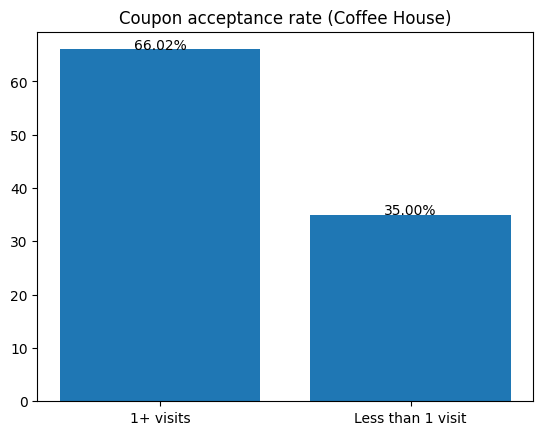

In [63]:
visits_gt_1 = ['1~3', '4~8', 'gt8']
condition = '(CoffeeHouse in @visits_gt_1)'
acceptance_ge_1 = coffeeshop_df.query(condition + ' & (Y == 1)').shape[0] /coffeeshop_df.query(condition).shape[0] * 100

condition = '(CoffeeHouse not in @visits_gt_1)'
acceptance_lt_1 = coffeeshop_df.query(condition + ' & (Y == 1)').shape[0] /coffeeshop_df.query(condition).shape[0] * 100

values = [acceptance_ge_1, acceptance_lt_1]
plt.bar(['1+ visits', 'Less than 1 visit'], values)
plt.title('Coupon acceptance rate (Coffee House)')
for index, value in enumerate(values):
    plt.text(index, value, f'{value:.2f}%', ha='center')
plt.show()

Identify the acceptance rates based on the passenger type

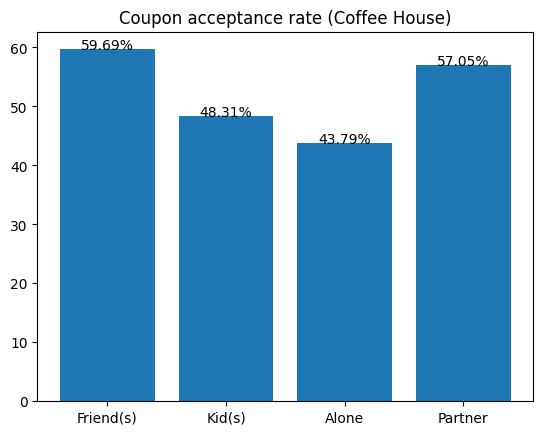

In [68]:
passenger_dict = {}
acceptances = []
for passenger in coffeeshop_df['passenger'].unique():
    condition = '(passenger == @passenger)'
    passenger_dict[passenger] =  coffeeshop_df.query(condition + ' & (Y == 1)').shape[0] /coffeeshop_df.query(condition).shape[0] * 100
    
values = list(passenger_dict.values())
plt.bar(passenger_dict.keys(), values)
plt.title('Coupon acceptance rate (Coffee House)')
for index, value in enumerate(values):
    plt.text(index, value, f'{value:.2f}%', ha='center')
plt.show()

Acceptance rates based on age

[69.6774193548387, 49.12783129393387]


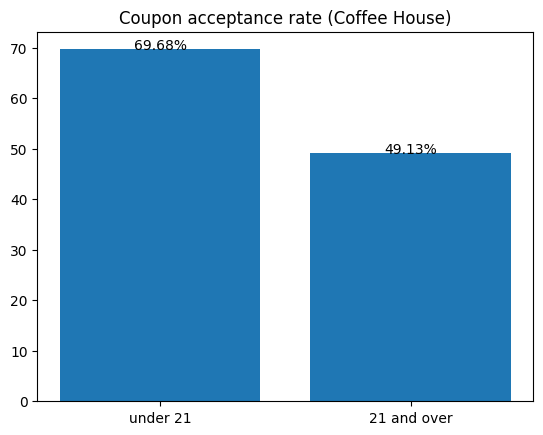

In [142]:
age_lt_21 = coffeeshop_df.query('(age_int < 21) & (Y == 1)').shape[0] / coffeeshop_df.query('age_int < 21').shape[0] * 100

age_ge_21 = coffeeshop_df.query('(age_int >= 21) & (Y == 1)').shape[0] / coffeeshop_df.query('(age_int >= 21)').shape[0] * 100


values = [age_lt_21, age_ge_21]
print(values)
plt.bar(['under 21', '21 and over'], values)
plt.title('Coupon acceptance rate (Coffee House)')
for index, value in enumerate(values):
    plt.text(index, value, f'{value:.2f}%', ha='center')
plt.show()

Acceptance distribution by gender for coffee house coupons

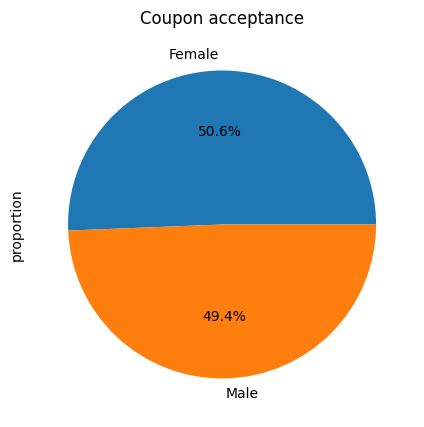

In [98]:
acceptance_data = coffeeshop_df.query('Y == 1')['gender'].value_counts(normalize=True)
plt.figure(figsize=(5,5))
acceptance_data.plot.pie(autopct='%1.1f%%')
plt.title('Coupon acceptance')
plt.show()

Acceptance based on marital status

In [102]:
for status in coffeeshop_df['maritalStatus'].unique():
    print(f'Marital status: {status}')
    print(coffeeshop_df.query(f'maritalStatus == "{status}"')['Y'].replace({0: 'Not Accepted', 1: 'Accepted'}).value_counts(normalize=True))

Marital status: Unmarried partner
Y
Not Accepted    0.521618
Accepted        0.478382
Name: proportion, dtype: float64
Marital status: Single
Y
Accepted        0.516129
Not Accepted    0.483871
Name: proportion, dtype: float64
Marital status: Married partner
Y
Not Accepted    0.506814
Accepted        0.493186
Name: proportion, dtype: float64
Marital status: Divorced
Y
Accepted        0.523179
Not Accepted    0.476821
Name: proportion, dtype: float64
Marital status: Widowed
Y
Not Accepted    0.648649
Accepted        0.351351
Name: proportion, dtype: float64


Acceptance rate by education level, specifically check High school vs others, since the age is under 21 for most coffee house coupon accepted drivers

In [122]:
education_query = 'Some High School'
print(f'Education: {education_query}')
print(coffeeshop_df.query(f'education == "{education_query}"')['Y'].replace({0: 'Not Accepted', 1: 'Accepted'}).value_counts(normalize=True))
print('-------------------')
print(f'Education: Others')
print(coffeeshop_df.query(f'education != "{education_query}"')['Y'].replace({0: 'Not Accepted', 1: 'Accepted'}).value_counts(normalize=True))

Education: Some High School
Y
Accepted        0.607143
Not Accepted    0.392857
Name: proportion, dtype: float64
-------------------
Education: Others
Y
Not Accepted    0.501512
Accepted        0.498488
Name: proportion, dtype: float64


In [161]:
visits_gt_1 = ['1~3', '4~8', 'gt8']
passenger_conditions  = ['Friend(s)']

condition = '(CoffeeHouse in @visits_gt_1) & (passenger in  @passenger_conditions)'
acceptance = coffeeshop_df.query(condition + ' & (Y == 1)').shape[0] /coffeeshop_df.query(condition).shape[0]
print('Acceptance rate for drivers who go to coffee houses more than once a month and had friends as passengers: {:.2%}'.format(acceptance))

condition = condition + ' & (age_int < 21)'
acceptance = coffeeshop_df.query(condition + ' & (Y == 1)').shape[0] /coffeeshop_df.query(condition).shape[0]
print('Acceptance rate for drivers under age 21 who go to coffee houses more than once a month and had friends as passengers: {:.2%}'.format(acceptance))

passenger_conditions  = ['Partner']

condition1 = '(CoffeeHouse in @visits_gt_1) & (passenger in  @passenger_conditions)'
acceptance = coffeeshop_df.query(condition1 + ' & (Y == 1)').shape[0] /coffeeshop_df.query(condition1).shape[0]
print('Acceptance rate for drivers who go to coffee houses more than once a month and had friends as passengers: {:.2%}'.format(acceptance))

Acceptance rate for drivers who go to coffee houses more than once a month and had friends as passengers: 76.32%
Acceptance rate for drivers under age 21 who go to coffee houses more than once a month and had friends as passengers: 88.24%
Acceptance rate for drivers who go to coffee houses more than once a month and had friends as passengers: 78.33%


### Observations for Coffee House coupons

The overall acceptance rate for coffee house coupons is **50%**

The Coffee House specific coupon acceptance is analyzed for varieties for factors. Following are the observations:

- **Temperature** - The acceptance is at 53% when the temperature is 80
- **Visit count** - The acceptance is 66% for users who visit coffee house at least once. For drivers who visit less than 1 time, the acceptance rate is only 35%
- **gender** - The coupon acceptance rate is evenly distributed between female and male drivers.
- **Passenger** - The coupon acceptance is affected by the passenger type. The acceptance rate is highest at 59% when passenger is Friend(s), followed by 57% for passengers who is a Partner.
- **age** - The coupon acceptance is affected by the age of the driver, with 69.63% acceptance for drivers under age 21.
- **Marital Status** - Martial status does affect the coupon acceptance for drivers whose status is Widowed, lowest at 35%.

Based on these observations, the factors that affect the Coffee House coupon acceptance are visits per month, age and the passenger.

The coupon acceptance rate is **88.24%** for drivers under 21 years of age, who visit a Coffee House at least once and have Friend(s) as the passenger.